# Experimentando con rankings de partidos
## Implementación en C++ 💪💪
Let's get this show on the road


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [13]:
!rm -rf ./build
!mkdir ./build
!cd ./build && git submodule init
!cd ./build && git submodule update
!cp -r ../src ./build/src
!rm -rf ./build/src/CMakeCache.txt
!cd ./build/src/ && cmake \
  -DCMAKE_BUILD_TYPE=Release -DCMAKE_CXX_FLAGS="-Wno-sign-compare" .
!cd ./build/src && make
!cp ./build/src/tp1 ./src
!rm -rf ./build

-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /home/roni/Documents/metnum/metnum-tp1/entregable/notebooks/build/src
Scanning dependencies of target tp1
[ 16%] Linking CXX executable tp1
[100%] Built target tp1


In [5]:
# Verifico la correcta instalación. Si no falla el import está OK
from commons import *

In [25]:
# Carga de datos ATP
import pandas as pd

cmm = check_output(["./src", "0", "../data/atp_matches_2015.dat"]).decode("utf-8").split("\n")
wp = check_output(["./src", "1", "../data/atp_matches_2015.dat"]).decode("utf-8").split("\n")
bp = check_output(["./src", "2", "../data/atp_matches_2015.dat"]).decode("utf-8").split("\n")

cmm = [float(i) for i in cmm]
wp = [float(i) for i in wp]
bp = [float(i) for i in bp]

i = 0
players_index = {}
players_wins = [0] * 430
players_loss = [0] * 430
players_arr = set()


file = open("../data/atp_matches_2015.dat", "r")
for line in file.readlines():
    if i == 0:
        N,M = line.split(" ")
    else:
        a,p1,b,p2,c = line.split(" ")
        if p1 not in players_arr:
            players_arr.add(p1)
        if p2 not in players_arr:
            players_arr.add(p2)
    i += 1

players_arr = sorted(players_arr)
i = 0
file.seek(0)
for line in file.readlines():
    if i == 0:
        N,M = line.split(" ")
    else:
        a,p1,b,p2,c = line.split(" ")
        players_wins[players_arr.index(p1)] += 1
        players_loss[players_arr.index(p2)] += 1
    i += 1
    
players = pd.read_csv("../data/atp_players.csv", encoding="UTF-8", names=["id","nombre","apellido","?","nac","pais"])
players = players[players['id'].isin(players_arr)] # Sacamos a los jugadores que no tienen partidos
players["CMM"] = cmm
players["WP"] = wp
players["BP"] = bp
players["wins"] = players_wins
players["loss"] = players_loss
players

,id,nombre,apellido,?,nac,pais,CMM,WP,BP,wins,loss
643,100644,Alexander,Zverev,R,19970420.0,GER,0.626871,0.451613,0.470968,14,17
3162,103163,Tommy,Haas,R,19780403.0,GER,0.425718,0.181818,0.309091,2,9
3187,103188,Michael,Russell,R,19780501.0,USA,0.442967,0.000000,0.200000,0,1
3284,103285,Radek,Stepanek,R,19781127.0,CZE,0.586419,0.411765,0.447059,7,10
3332,103333,Ivo,Karlovic,R,19790228.0,CRO,0.804331,0.603175,0.561905,38,25
...,...,...,...,...,...,...,...,...,...,...,...
45357,200271,Egor,Matvievici,NaN,19970214.0,MDA,0.376443,0.000000,0.200000,0,1
45358,200272,Jean Jacques,Rakotohasy,NaN,19940823.0,MAD,0.607832,1.000000,0.800000,1,0
45359,200273,Hady,Habib,NaN,19980821.0,LIB,0.470578,0.500000,0.500000,1,1
45360,200274,Alex,Diaz,NaN,19970802.0,PUR,0.630696,1.000000,0.800000,2,0


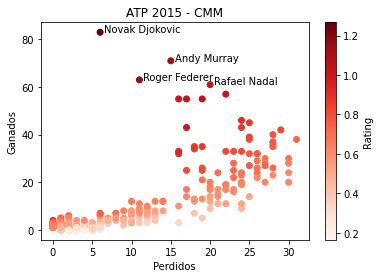

In [10]:
# Interpretacion de datos
# Grafico eje X = derrotas
# Y = victorias
# Color = Rating del jugador

import matplotlib.pyplot as plt
plt.title('ATP 2015 - CMM')
plt.xlabel('Perdidos')
plt.ylabel('Ganados')

# CMM
sc = plt.scatter(players['loss'].tolist(),players['wins'].tolist(),c=players['CMM'].tolist(),cmap='Reds')
plt.colorbar(sc, label='Rating')

# BP
# sc = plt.scatter(players['loss'].tolist(),players['wins'].tolist(),c=players['BP'].tolist(),cmap='Reds')
# plt.colorbar(sc, label='Rating BP')

# WP
# sc = plt.scatter(players['loss'].tolist(),players['wins'].tolist(),c=players['WP'].tolist(),cmap='Reds')
# plt.colorbar(sc, label='Rating WP')

jugadores = []
for n, s in zip(players['nombre'].tolist(), players['apellido'].tolist()):
    jugadores.append(n + " " + s)

names = ["Roger Federer", "Novak Djokovic", "Rafael Nadal", "Andy Murray"]
for i, name in enumerate(jugadores):
    if name in names:
        plt.annotate(name, (players['loss'].tolist()[i] + 0.5, players['wins'].tolist()[i]))

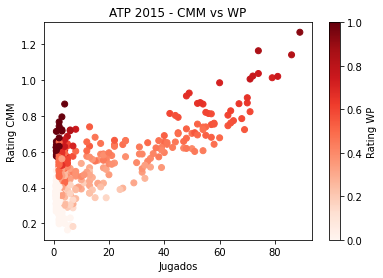

In [11]:
# CMM vs WP - ATP

# Filtrar jugadores con > 15 partidos:
# players = players[players['wins'] + players['loss'] > 15]

wp_players = []
n = len(players['wins'].tolist())
for i in range(n):
    wp_players.append(players['wins'].tolist()[i]/(players['wins'].tolist()[i] + players['loss'].tolist()[i]))

played_matches = []
for i in range(n):
    played_matches.append(players['wins'].tolist()[i] + players['loss'].tolist()[i])
    
plt.title('ATP 2015 - CMM vs WP')
plt.xlabel('Jugados')
plt.ylabel('Rating CMM')

sc2 = plt.scatter(played_matches, players['CMM'].tolist(), c=wp_players,cmap='Reds')
plt.colorbar(sc2, label='Rating WP')

,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count
67,Chelsea,Liverpool,1,1
79,Liverpool,Manchester City,0,0
105,Arsenal,Liverpool,1,1
239,Liverpool,Leicester City,1,1
249,West Ham United,Liverpool,1,1
268,Manchester United,Liverpool,0,0
288,Everton,Liverpool,0,0


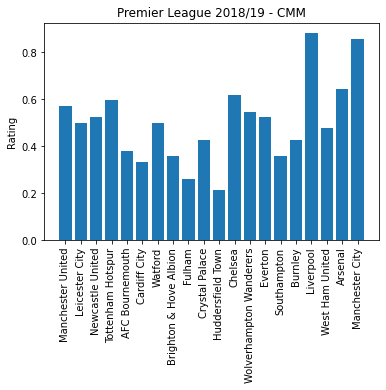

In [12]:
# CMM - Premier League
premier = pd.read_csv("../data/premier-2018-2019.csv", encoding="UTF-8", usecols=["home_team_name", "away_team_name", "home_team_goal_count", "away_team_goal_count"])

teams = {}
indices = []
matches = []
i = 0

for index, row in premier.iterrows():
#     if index < 352:
    if row["home_team_name"] not in indices:
        teams[row["home_team_name"]] = i
        indices.append(row["home_team_name"])
        i += 1
    if row["away_team_name"] not in indices:
        teams[row["away_team_name"]] = i
        indices.append(row["away_team_name"])
        i += 1
    matches.append([0, teams[row["home_team_name"]], row["home_team_goal_count"], teams[row["away_team_name"]], row["away_team_goal_count"]])
        
file = open("../data/premier-2018-2019.dat", "w")
file.write(str(len(teams)) + " " + str(len(matches)) + "\n")
for match in matches:
    file.write(str(match[0]) + " " + str(match[1]) + " " + str(match[2]) + " " + str(match[3]) + " " + str(match[4]) + "\n")
file.close()

cmm = check_output(["./src", "0", "../data/premier-2018-2019.dat"]).decode("utf-8").split("\n")
cmm = [float(i) for i in cmm]

plt.title('Premier League 2018/19 - CMM')
plt.ylabel('Rating')
plt.bar([*range(0, 20)], cmm)
plt.xticks([*range(0, 20)], list(teams.keys()), rotation='vertical')

# Empates del Liverpool
liverpool_draws = premier[(premier["home_team_goal_count"] == premier["away_team_goal_count"]) & ((premier["home_team_name"] == "Liverpool") | (premier["away_team_name"] == "Liverpool"))]
liverpool_draws

### Estabilidad de calculos
Para correr esta parte de la notebook es necesario contar con el archivo `metnum.py` y las carpeta test que dio la catedra. Tambien es importante editar la variable de la celda de abajo con el path a donde estan estos archivos.

In [10]:
path_test = "../../"

In [14]:
!cd {path_test} && python3 metnum.py test

g++ -o ./tp ./entregable/src/main.o ./entregable/src/CMakeFiles/3.16.3/CompilerIdCXX/CMakeCXXCompilerId.o ./entregable/src/Clases/SistemaLineal.o ./entregable/src/Clases/Partida.o ./entregable/src/Clases/Equipo.o ./entregable/src/Clases/Torneo.o ./entregable/src/cmake-build-debug/CMakeFiles/3.17.3/CompilerIdCXX/CMakeCXXCompilerId.o
/usr/bin/ld: ./entregable/src/CMakeFiles/3.16.3/CompilerIdCXX/CMakeCXXCompilerId.o: in function `main':
CMakeCXXCompilerId.cpp:(.text.startup+0x0): multiple definition of `main'; ./entregable/src/main.o:main.cpp:(.text.startup+0x0): first defined here
/usr/bin/ld: ./entregable/src/cmake-build-debug/CMakeFiles/3.17.3/CompilerIdCXX/CMakeCXXCompilerId.o: in function `main':
CMakeCXXCompilerId.cpp:(.text.startup+0x0): multiple definition of `main'; ./entregable/src/main.o:main.cpp:(.text.startup+0x0): first defined here
/usr/bin/ld: ./entregable/src/cmake-build-debug/CMakeFiles/3.17.3/CompilerIdCXX/CMakeCXXCompilerId.o:(.data.rel.local+0x18): multiple definition

In [34]:
# Promedio de error para los tests completos

import pandas as pd
files = ["test_completo_10_1", "test_completo_100_4", "test_completo_1000_2", "test_completo_1000_8", "test_completo_100_8"]

error_data = []
for f in files:
    error = 0
    lines = 0
    with open(f"{path_test}tests/test_completos/" + f + ".out") as output_f, open(f"{path_test}/tests/test_completos/" + f + ".expected") as expected_f: 
        for out_s, expected_s in zip(output_f, expected_f):
            lines += 1
            out = float(out_s)
            expected = float(expected_s)
            error += abs(out - expected)
    
    error_avg = error/lines
    error_data.append({ "Test": f, "Error promedio": error_avg })
    

data = pd.DataFrame(data=error_data)
data

,Test,Error promedio
0,test_completo_10_1,5.389573e-09
1,test_completo_100_4,8.263856e-07
2,test_completo_1000_2,1.493597e-05
3,test_completo_1000_8,6.738284e-05
4,test_completo_100_8,2.467624e-06
